In [59]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pywt
import pandas as pd
from scipy import stats

In [5]:
from scipy.integrate import quad
from numpy import*
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

N=256
T=50

Size = 200

def S(t):
    if t >= 0 and t <=Size:
        return sin(2*pi*t/T)
    else:
        return 0
#     return sin(2*pi*t/T)



def S_noise(t):
    return sin(2*pi*t/T)+ np.random.normal(0, 0.2, 1)


def w(a,b):    
    f = lambda t :(1/a**0.5)*exp(-0.5*((t-b)/a)**2) * (((t-b)/a)**2-1)*S(t)  
    r = quad(f, -N, N)  #интеграл
    return round(r[0],3)  #round(number[, ndigits]) - округляет число number до ndigits знаков после запятой

def w_n(a,b):    
    f = lambda t :(1/a**0.5)*exp(-0.5*((t-b)/a)**2) * (((t-b)/a)**2-1)*S_noise(t)  
    r = quad(f, -N, N)  #интеграл
    return round(r[0],3)  #round(number[, ndigits]) - округляет число number до ndigits знаков после запятой

Text(0, 0.5, 'period')

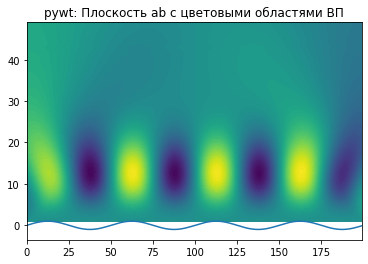

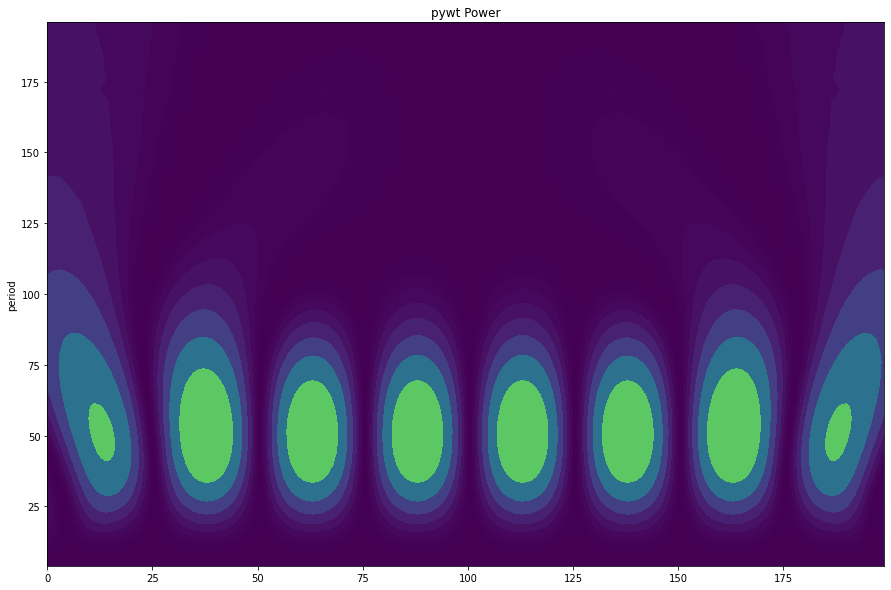

In [6]:
# time, sst = pywt.data.nino()

sst=[S(t) for t in arange(0,Size,1)]
time=[t for t in arange(0,Size,1)]




# print(time)
# print(sst)
# dt = time[1] - time[0]
dt = 1



# data_size = len(time)
# print(data_size)
# Taken from http://nicolasfauchereau.github.io/climatecode/posts/wavelet-analysis-in-python/
# wavelet = 'cmor1.5-1.0'
wavelet = 'mexh'
# wavelet = 'morl'
# wavelet = 'mexh'
# wavelet = 'mexh'
max_scale = 50
scales = np.arange(1, max_scale)

[cfs, frequencies] = pywt.cwt(sst, scales, wavelet, dt)
# print(cfs)
# print(len(cfs[0]))


A_scales, B_time = meshgrid(time,scales)
# CFS = cfs.reshape(max_scale-1,data_size - 1)


plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.plot(time, sst)
# plt.show()





plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.contourf(A_scales, B_time, cfs, 100)
# plt.show()





power = (abs(cfs)) ** 2
period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time, period, power, levels, extend='both')

ax.set_title("pywt Power")
ax.set_ylabel('period')


Text(0, 0.5, 'period')

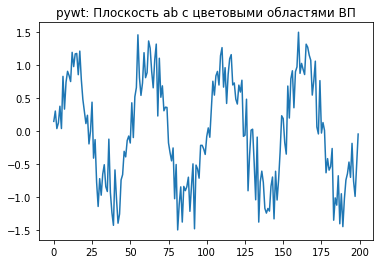

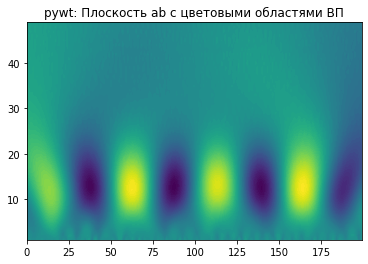

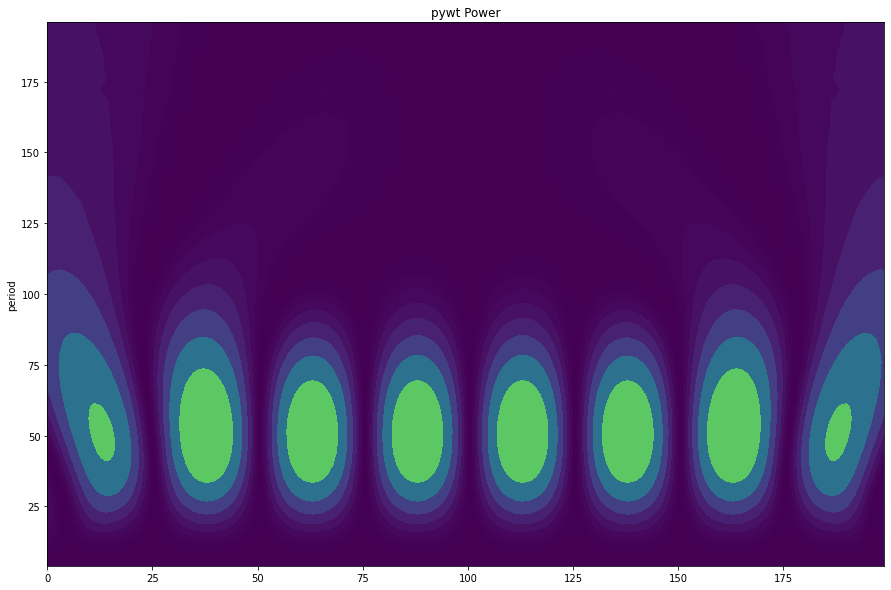

In [7]:
sst_noise = sst + np.random.normal(0, 0.3, size = Size)



[cfs_noise, frequencies] = pywt.cwt(sst_noise, scales, wavelet, dt)
# print(cfs)
# print(len(cfs[0]))


A_scales, B_time = meshgrid(time,scales)
# CFS = cfs.reshape(max_scale-1,data_size - 1)


plt.figure('sst_noise')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.plot(time, sst_noise)
# plt.show()





plt.figure('pywt: 2D-график для z = w (a,b)1')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.contourf(A_scales, B_time, cfs_noise, 100)
# plt.show()





power = (abs(cfs)) ** 2
period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time, period, power, levels, extend='both')

ax.set_title("pywt Power")
ax.set_ylabel('period')

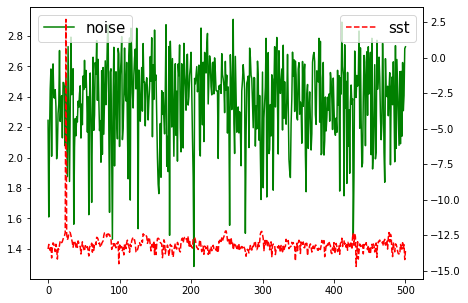

In [36]:
import numpy as np
import scipy.integrate
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from scipy.fft import irfft
from scipy.optimize import curve_fit
import math


Size = 1000
T = 40

time = np.arange(0,Size,1)


sst = np.sin(2 * np.pi * time / T) 

sst_noise = sst + np.random.normal(0, 10, size = Size)



SAMPLE_RATE = Size #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

sst_noise_f = rfft(sst_noise)
sst_f = rfft(sst)

xf = rfftfreq(N, 1 / SAMPLE_RATE)



fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(xf, np.log10(np.abs(sst_noise_f)), 'green', label='noise')
ax2.plot(xf, np.log10(np.abs(sst_f)), color='red', linestyle='--', label = 'sst')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')


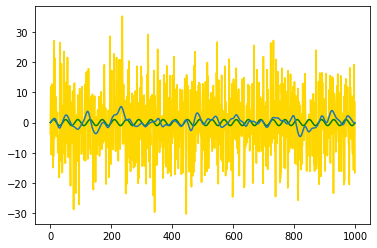

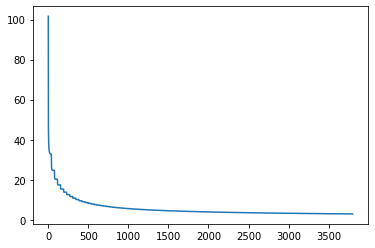

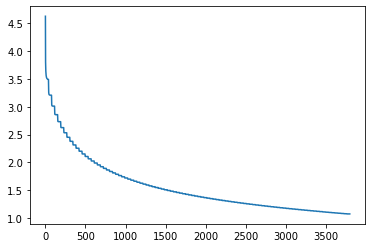

In [37]:
# Size_db = 39
min_db = 0
max_db = 39

Size_iter = 100


std_noise = np.zeros((max_db-1-min_db)*Size_iter + 1)
std_noise[0] = np.square(sst_noise - sst).mean()

    

sst_tr = sst_noise

plt.figure('dwt filter')
plt.plot(sst_noise, color = 'gold')
plt.plot(sst, color = 'green')
for j in range(0,Size_iter,1):
    for i in range(min_db,max_db-1,1):
        (sst_cA, sst_cD) = pywt.dwt(sst_tr, 'db' + str(i+1),mode = 'zero')
        zero = np.zeros(len(sst_cA))
        sst_tr = pywt.idwt(sst_cA, zero, 'db' + str(i+1), mode = 'zero')
        std_noise[1 + (i - min_db) + j*(max_db-1-min_db)] = np.square(sst_tr - sst).mean()
plt.figure('dwt filter')
plt.plot(sst_noise, color = 'gold')
plt.plot(sst, color = 'green')        
plt.plot(sst_tr)


plt.figure('std_noise')
plt.plot(std_noise)

plt.figure('log std_noise')
plt.plot(np.log(std_noise))
# for i in range(1,Size_db,1):
#     (sst_cA, sst_cD) = pywt.dwt(sst_tr, 'db' + str(i),mode = 'zero')
#     zero = np.zeros(len(sst_cA))
#     sst_tr = pywt.idwt(sst_cA, zero, 'db' + str(i), mode = 'zero')
#     std_noise[i] = (sst_tr - sst).std()
# print(std_noise)
# plt.figure('db_1//i')
# plt.plot(std_noise[1:])

    
# plt.figure('dwt filter')
# plt.plot(sst_noise, color = 'gold')
# plt.plot(sst, color = 'green')
# plt.plot(sst_tr, color = 'black')


# sst_tr = sst_noise
# for i in range(1,Size_db,1):
#     (sst_cA, sst_cD) = pywt.dwt(sst_noise, 'db' + str(i),mode = 'zero')
#     zero = np.zeros(len(sst_cA))
#     sst_tr = pywt.idwt(sst_cA, zero, 'db' + str(i), mode = 'zero')
#     std_noise[i] = (sst_tr - sst).std()
    
# print(std_noise)
# plt.figure('db_i')
# plt.plot(std_noise[1:])

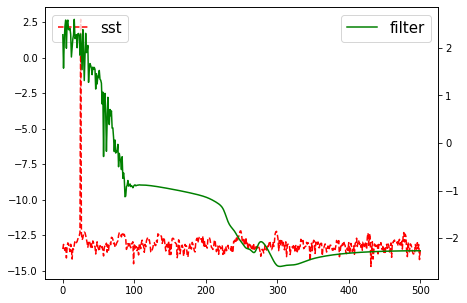

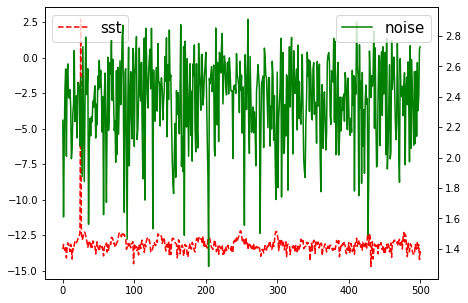

In [38]:
SAMPLE_RATE = Size #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

sst_f = rfft(sst)
sst_noise_f = rfft(sst_noise)
sst_tr_f = rfft(sst_tr)

xf = rfftfreq(N, 1 / SAMPLE_RATE)



fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
# ax1.plot(xf, np.log10(np.abs(sst_noise_f)), 'green', label='noise')
ax1.plot(xf, np.log10(np.abs(sst_f)), color='red', linestyle='--', label = 'sst')
ax2.plot(xf, np.log10(np.abs(sst_tr_f)), 'green', label='filter')


ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')



fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(122)
ax2 = ax1.twinx()
ax1.plot(xf, np.log10(np.abs(sst_f)), color='red', linestyle='--', label = 'sst')
ax2.plot(xf, np.log10(np.abs(sst_noise_f)), 'green', label='noise')
# ax1.plot(xf, np.log10(np.abs(sst_tr_f)), 'green', label='tr')


ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')

811.1707236773622
259
25


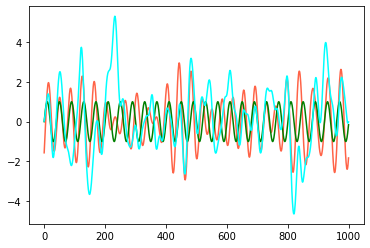

In [40]:
print(np.abs(sst_noise_f).max())
print(np.abs(sst_noise_f).argmax())
print(np.abs(sst_f).argmax())

sst_noise_f_filter = np.zeros(len(sst_noise_f), dtype = 'complex')
# sst_noise_f_filter[np.abs(sst_noise_f).argmax()] = sst_noise_f[np.abs(sst_noise_f).argmax()]

tr_f_min = 20
tr_f_max = 30

for i in range(tr_f_min,tr_f_max,1):
    sst_noise_f_filter[i] = sst_noise_f[i]


sst_fourier_filter = irfft(sst_noise_f_filter)

plt.figure('dwt filter')
# plt.plot(sst_noise, color = 'gold')
plt.plot(sst_fourier_filter, color = 'tomato')
plt.plot(sst, color = 'green')        
plt.plot(sst_tr, color = 'aqua')
# plt.plot(sst_fourier_filter, color = 'tomato')





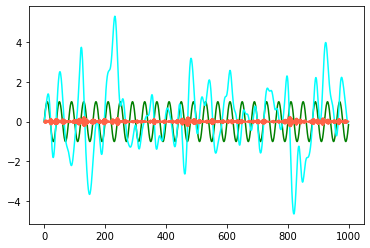

In [41]:
(sst_cA, sst_cD) = pywt.dwt(sst_tr, 'db1',mode = 'zero')
zero = np.zeros(len(sst_cA))
sst_tr_new = pywt.idwt(zero, sst_cD, 'db1', mode = 'zero')

plt.figure('dwt filter')
# plt.plot(sst_noise, color = 'gold')
plt.plot(sst, color = 'green')        
plt.plot(sst_tr, color = 'aqua')
plt.plot(sst_tr_new, color = 'tomato')




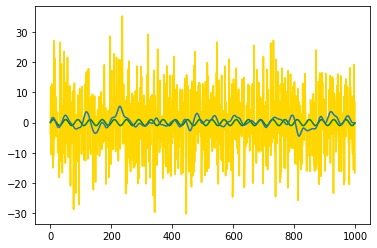

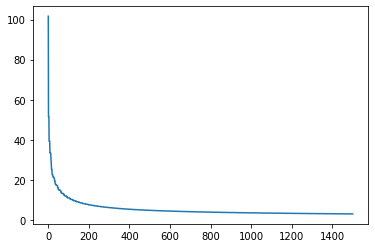

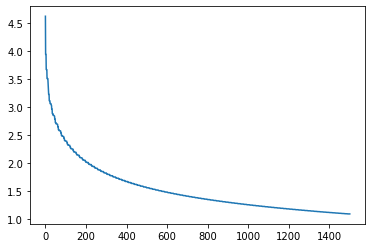

In [42]:
# 'bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4',
# 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5',
# 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8',

Size_iter = 100

bior = ['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', \
        'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', \
        'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8'
       ]

std_noise = np.zeros(Size_iter*len(bior) + 1)
std_noise[0] = np.square(sst_noise - sst).mean()

    

sst_tr = sst_noise

plt.figure('dwt filter')
plt.plot(sst_noise, color = 'gold')
plt.plot(sst, color = 'green')
for j in range(0,Size_iter,1):
    for i, bio in enumerate(bior): 
        (sst_cA, sst_cD) = pywt.dwt(sst_tr, bio, mode = 'zero')
        zero = np.zeros(len(sst_cA))
        sst_tr = pywt.idwt(sst_cA, zero, bio, mode = 'zero')
        std_noise[1 + j*len(bior) + i] = np.square(sst_tr - sst).mean()

plt.figure('dwt filter')
plt.plot(sst_noise, color = 'gold')
plt.plot(sst, color = 'green')        
plt.plot(sst_tr)


plt.figure('std_noise')
plt.plot(std_noise)

plt.figure('log std_noise')
plt.plot(np.log(std_noise))
# for i in range(1,Size_db,1):
#     (sst_cA, sst_cD) = pywt.dwt(sst_tr, 'db' + str(i),mode = 'zero')
#     zero = np.zeros(len(sst_cA))
#     sst_tr = pywt.idwt(sst_cA, zero, 'db' + str(i), mode = 'zero')
#     std_noise[i] = (sst_tr - sst).std()
# print(std_noise)
# plt.figure('db_1//i')
# plt.plot(std_noise[1:])

    
# plt.figure('dwt filter')
# plt.plot(sst_noise, color = 'gold')
# plt.plot(sst, color = 'green')
# plt.plot(sst_tr, color = 'black')


# sst_tr = sst_noise
# for i in range(1,Size_db,1):
#     (sst_cA, sst_cD) = pywt.dwt(sst_noise, 'db' + str(i),mode = 'zero')
#     zero = np.zeros(len(sst_cA))
#     sst_tr = pywt.idwt(sst_cA, zero, 'db' + str(i), mode = 'zero')
#     std_noise[i] = (sst_tr - sst).std()
    
# print(std_noise)
# plt.figure('db_i')
# plt.plot(std_noise[1:])


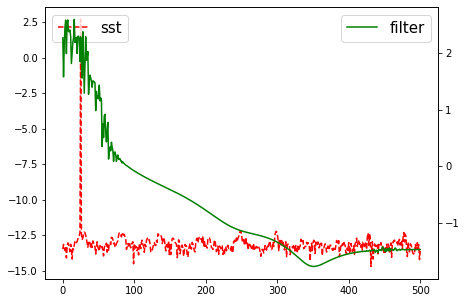

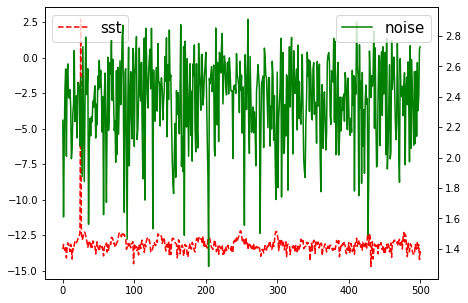

In [43]:
SAMPLE_RATE = Size #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

sst_f = rfft(sst)
sst_noise_f = rfft(sst_noise)
sst_tr_f = rfft(sst_tr)

xf = rfftfreq(N, 1 / SAMPLE_RATE)



fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
# ax1.plot(xf, np.log10(np.abs(sst_noise_f)), 'green', label='noise')
ax1.plot(xf, np.log10(np.abs(sst_f)), color='red', linestyle='--', label = 'sst')
ax2.plot(xf, np.log10(np.abs(sst_tr_f)), 'green', label='filter')


ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')



fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(122)
ax2 = ax1.twinx()
ax1.plot(xf, np.log10(np.abs(sst_f)), color='red', linestyle='--', label = 'sst')
ax2.plot(xf, np.log10(np.abs(sst_noise_f)), 'green', label='noise')
# ax1.plot(xf, np.log10(np.abs(sst_tr_f)), 'green', label='tr')


ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')

811.1707236773622
259
25


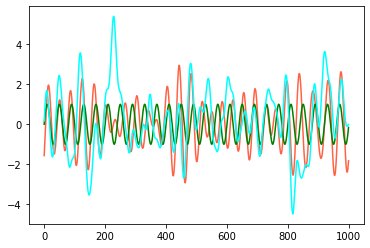

In [44]:
print(np.abs(sst_noise_f).max())
print(np.abs(sst_noise_f).argmax())
print(np.abs(sst_f).argmax())

sst_noise_f_filter = np.zeros(len(sst_noise_f), dtype = 'complex')
# sst_noise_f_filter[np.abs(sst_noise_f).argmax()] = sst_noise_f[np.abs(sst_noise_f).argmax()]

tr_f_min = 20
tr_f_max = 30

for i in range(tr_f_min,tr_f_max,1):
    sst_noise_f_filter[i] = sst_noise_f[i]


sst_fourier_filter = irfft(sst_noise_f_filter)

plt.figure('dwt filter')
# plt.plot(sst_noise, color = 'gold')
plt.plot(sst_fourier_filter, color = 'tomato')
plt.plot(sst, color = 'green')        
plt.plot(sst_tr, color = 'aqua')
# plt.plot(sst_fourier_filter, color = 'tomato')




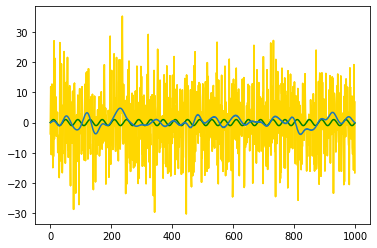

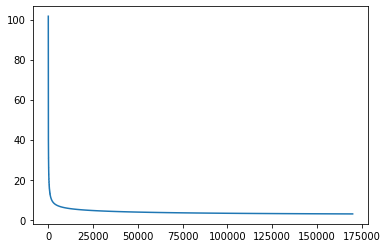

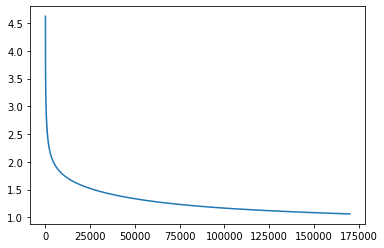

In [45]:
# 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 
# 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12',
# 'coif13', 'coif14', 'coif15', 'coif16', 'coif17'

Size_iter = 10000

coif = ['coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', \
        'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12',\
        'coif13', 'coif14', 'coif15', 'coif16', 'coif17'
       ]

std_noise = np.zeros(Size_iter*len(coif) + 1)
std_noise[0] = np.square(sst_noise - sst).mean()

    

sst_tr = sst_noise

plt.figure('dwt filter')
plt.plot(sst_noise, color = 'gold')
plt.plot(sst, color = 'green')
for j in range(0,Size_iter,1):
    for i, dw in enumerate(coif): 
        (sst_cA, sst_cD) = pywt.dwt(sst_tr, dw, mode = 'zero')
        zero = np.zeros(len(sst_cA))
        sst_tr = pywt.idwt(sst_cA, zero, dw, mode = 'zero')
        std_noise[1 + j*len(coif) + i] = np.square(sst_tr - sst).mean()

plt.figure('dwt filter')
plt.plot(sst_noise, color = 'gold')
plt.plot(sst, color = 'green')        
plt.plot(sst_tr)


plt.figure('std_noise')
plt.plot(std_noise)

plt.figure('log std_noise')
plt.plot(np.log(std_noise))
# for i in range(1,Size_db,1):
#     (sst_cA, sst_cD) = pywt.dwt(sst_tr, 'db' + str(i),mode = 'zero')
#     zero = np.zeros(len(sst_cA))
#     sst_tr = pywt.idwt(sst_cA, zero, 'db' + str(i), mode = 'zero')
#     std_noise[i] = (sst_tr - sst).std()
# print(std_noise)
# plt.figure('db_1//i')
# plt.plot(std_noise[1:])

    
# plt.figure('dwt filter')
# plt.plot(sst_noise, color = 'gold')
# plt.plot(sst, color = 'green')
# plt.plot(sst_tr, color = 'black')


# sst_tr = sst_noise
# for i in range(1,Size_db,1):
#     (sst_cA, sst_cD) = pywt.dwt(sst_noise, 'db' + str(i),mode = 'zero')
#     zero = np.zeros(len(sst_cA))
#     sst_tr = pywt.idwt(sst_cA, zero, 'db' + str(i), mode = 'zero')
#     std_noise[i] = (sst_tr - sst).std()
    
# print(std_noise)
# plt.figure('db_i')
# plt.plot(std_noise[1:])

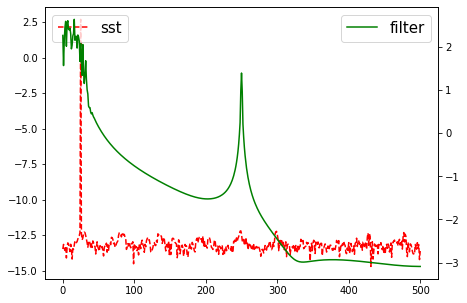

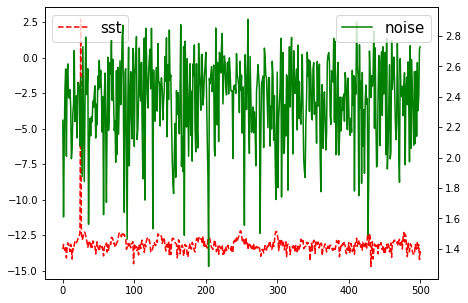

In [46]:
SAMPLE_RATE = Size #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

sst_f = rfft(sst)
sst_noise_f = rfft(sst_noise)
sst_tr_f = rfft(sst_tr)

xf = rfftfreq(N, 1 / SAMPLE_RATE)



fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
# ax1.plot(xf, np.log10(np.abs(sst_noise_f)), 'green', label='noise')
ax1.plot(xf, np.log10(np.abs(sst_f)), color='red', linestyle='--', label = 'sst')
ax2.plot(xf, np.log10(np.abs(sst_tr_f)), 'green', label='filter')


ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')



fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(122)
ax2 = ax1.twinx()
ax1.plot(xf, np.log10(np.abs(sst_f)), color='red', linestyle='--', label = 'sst')
ax2.plot(xf, np.log10(np.abs(sst_noise_f)), 'green', label='noise')
# ax1.plot(xf, np.log10(np.abs(sst_tr_f)), 'green', label='tr')


ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')

811.1707236773622
259
25


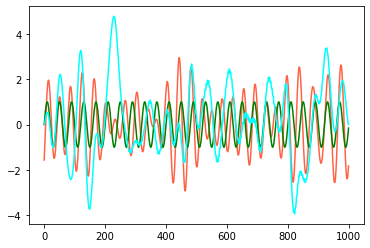

In [47]:
print(np.abs(sst_noise_f).max())
print(np.abs(sst_noise_f).argmax())
print(np.abs(sst_f).argmax())

sst_noise_f_filter = np.zeros(len(sst_noise_f), dtype = 'complex')
# sst_noise_f_filter[np.abs(sst_noise_f).argmax()] = sst_noise_f[np.abs(sst_noise_f).argmax()]
tr_f_min = 20
tr_f_max = 30

for i in range(tr_f_min,tr_f_max,1):
    sst_noise_f_filter[i] = sst_noise_f[i]


sst_fourier_filter = irfft(sst_noise_f_filter)

plt.figure('dwt filter')
# plt.plot(sst_noise, color = 'gold')
plt.plot(sst_fourier_filter, color = 'tomato')
plt.plot(sst, color = 'green')        
plt.plot(sst_tr, color = 'aqua')
# plt.plot(sst_fourier_filter, color = 'tomato')


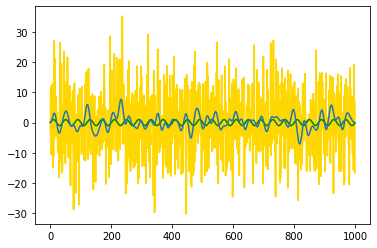

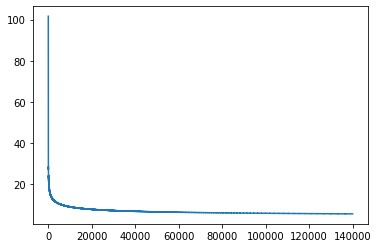

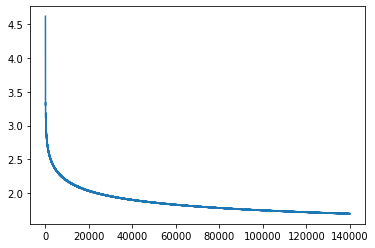

In [48]:
# 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4',\
# 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5',\
# 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8'

Size_iter = 10000

# rbio = ['rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4',\
#         'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5',\
#         'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8'
#        ]
rbio = ['rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4',\
        'rbio2.6', 'rbio2.8','rbio3.3', 'rbio3.5',\
        'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8'
       ]

std_noise = np.zeros(Size_iter*len(rbio) + 1)
std_noise[0] = np.square(sst_noise - sst).mean()

    

sst_tr = sst_noise

plt.figure('dwt filter')
plt.plot(sst_noise, color = 'gold')
plt.plot(sst, color = 'green')
for j in range(0,Size_iter,1):
    for i, dw in enumerate(rbio): 
        (sst_cA, sst_cD) = pywt.dwt(sst_tr, dw, mode = 'zero')
        zero = np.zeros(len(sst_cA))
        sst_tr = pywt.idwt(sst_cA, zero, dw, mode = 'zero')
        std_noise[1 + j*len(rbio) + i] = np.square(sst_tr - sst).mean()

plt.figure('dwt filter')
plt.plot(sst_noise, color = 'gold')
plt.plot(sst, color = 'green')        
plt.plot(sst_tr)


plt.figure('std_noise')
plt.plot(std_noise)

plt.figure('log std_noise')
plt.plot(np.log(std_noise))
# for i in range(1,Size_db,1):
#     (sst_cA, sst_cD) = pywt.dwt(sst_tr, 'db' + str(i),mode = 'zero')
#     zero = np.zeros(len(sst_cA))
#     sst_tr = pywt.idwt(sst_cA, zero, 'db' + str(i), mode = 'zero')
#     std_noise[i] = (sst_tr - sst).std()
# print(std_noise)
# plt.figure('db_1//i')
# plt.plot(std_noise[1:])

    
# plt.figure('dwt filter')
# plt.plot(sst_noise, color = 'gold')
# plt.plot(sst, color = 'green')
# plt.plot(sst_tr, color = 'black')


# sst_tr = sst_noise
# for i in range(1,Size_db,1):
#     (sst_cA, sst_cD) = pywt.dwt(sst_noise, 'db' + str(i),mode = 'zero')
#     zero = np.zeros(len(sst_cA))
#     sst_tr = pywt.idwt(sst_cA, zero, 'db' + str(i), mode = 'zero')
#     std_noise[i] = (sst_tr - sst).std()
    
# print(std_noise)
# plt.figure('db_i')
# plt.plot(std_noise[1:])

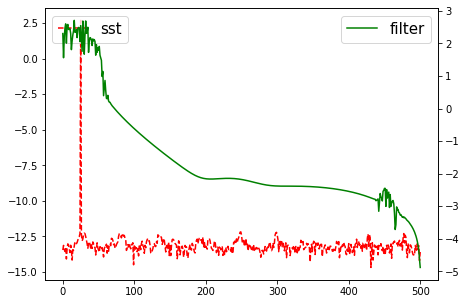

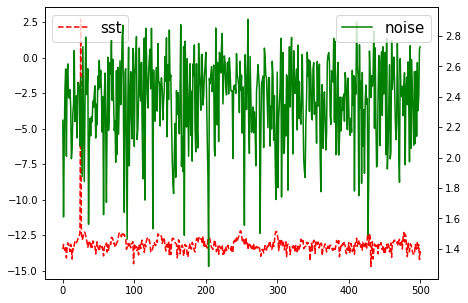

In [49]:
SAMPLE_RATE = Size #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

sst_f = rfft(sst)
sst_noise_f = rfft(sst_noise)
sst_tr_f = rfft(sst_tr)

xf = rfftfreq(N, 1 / SAMPLE_RATE)



fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
# ax1.plot(xf, np.log10(np.abs(sst_noise_f)), 'green', label='noise')
ax1.plot(xf, np.log10(np.abs(sst_f)), color='red', linestyle='--', label = 'sst')
ax2.plot(xf, np.log10(np.abs(sst_tr_f)), 'green', label='filter')


ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')



fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(122)
ax2 = ax1.twinx()
ax1.plot(xf, np.log10(np.abs(sst_f)), color='red', linestyle='--', label = 'sst')
ax2.plot(xf, np.log10(np.abs(sst_noise_f)), 'green', label='noise')
# ax1.plot(xf, np.log10(np.abs(sst_tr_f)), 'green', label='tr')


ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')

811.1707236773622
259
25


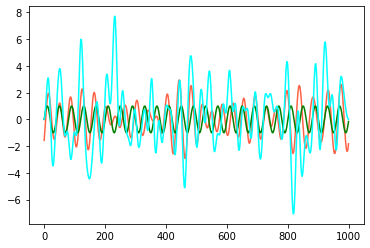

In [50]:
print(np.abs(sst_noise_f).max())
print(np.abs(sst_noise_f).argmax())
print(np.abs(sst_f).argmax())

sst_noise_f_filter = np.zeros(len(sst_noise_f), dtype = 'complex')
# sst_noise_f_filter[np.abs(sst_noise_f).argmax()] = sst_noise_f[np.abs(sst_noise_f).argmax()]
tr_f_min = 20
tr_f_max = 30

for i in range(tr_f_min,tr_f_max,1):
    sst_noise_f_filter[i] = sst_noise_f[i]


sst_fourier_filter = irfft(sst_noise_f_filter)

plt.figure('dwt filter')
# plt.plot(sst_noise, color = 'gold')
plt.plot(sst_fourier_filter, color = 'tomato')
plt.plot(sst, color = 'green')        
plt.plot(sst_tr, color = 'aqua')
# plt.plot(sst_fourier_filter, color = 'tomato')


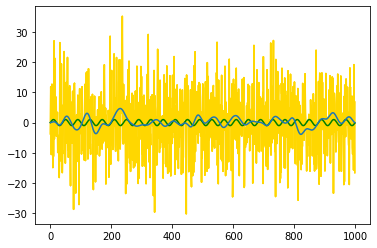

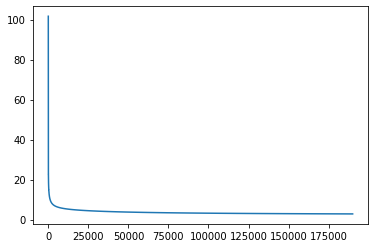

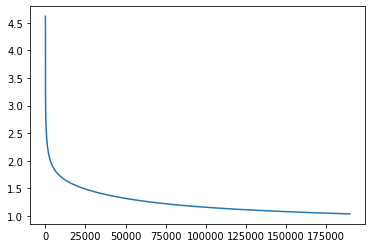

In [51]:
# 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7',\
# 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13',\
# 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20'

Size_iter = 10000


sym = ['sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7',\
        'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13',\
        'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20'
       ]

std_noise = np.zeros(Size_iter*len(sym) + 1)
std_noise[0] = np.square(sst_noise - sst).mean()

    

sst_tr = sst_noise

plt.figure('dwt filter')
plt.plot(sst_noise, color = 'gold')
plt.plot(sst, color = 'green')
for j in range(0,Size_iter,1):
    for i, dw in enumerate(sym): 
        (sst_cA, sst_cD) = pywt.dwt(sst_tr, dw, mode = 'zero')
        zero = np.zeros(len(sst_cA))
        sst_tr = pywt.idwt(sst_cA, zero, dw, mode = 'zero')
        std_noise[1 + j*len(sym) + i] = np.square(sst_tr - sst).mean()

plt.figure('dwt filter')
plt.plot(sst_noise, color = 'gold')
plt.plot(sst, color = 'green')        
plt.plot(sst_tr)


plt.figure('std_noise')
plt.plot(std_noise)

plt.figure('log std_noise')
plt.plot(np.log(std_noise))
# for i in range(1,Size_db,1):
#     (sst_cA, sst_cD) = pywt.dwt(sst_tr, 'db' + str(i),mode = 'zero')
#     zero = np.zeros(len(sst_cA))
#     sst_tr = pywt.idwt(sst_cA, zero, 'db' + str(i), mode = 'zero')
#     std_noise[i] = (sst_tr - sst).std()
# print(std_noise)
# plt.figure('db_1//i')
# plt.plot(std_noise[1:])

    
# plt.figure('dwt filter')
# plt.plot(sst_noise, color = 'gold')
# plt.plot(sst, color = 'green')
# plt.plot(sst_tr, color = 'black')


# sst_tr = sst_noise
# for i in range(1,Size_db,1):
#     (sst_cA, sst_cD) = pywt.dwt(sst_noise, 'db' + str(i),mode = 'zero')
#     zero = np.zeros(len(sst_cA))
#     sst_tr = pywt.idwt(sst_cA, zero, 'db' + str(i), mode = 'zero')
#     std_noise[i] = (sst_tr - sst).std()
    
# print(std_noise)
# plt.figure('db_i')
# plt.plot(std_noise[1:])

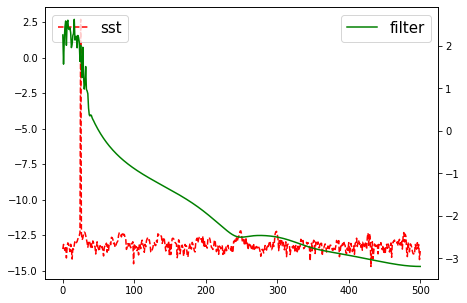

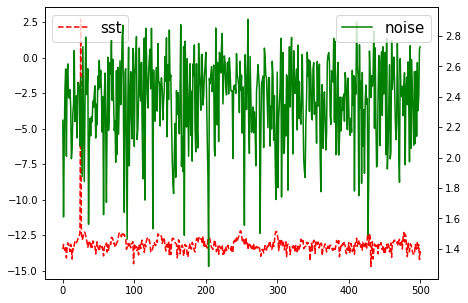

In [52]:
SAMPLE_RATE = Size #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

sst_f = rfft(sst)
sst_noise_f = rfft(sst_noise)
sst_tr_f = rfft(sst_tr)

xf = rfftfreq(N, 1 / SAMPLE_RATE)



fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
# ax1.plot(xf, np.log10(np.abs(sst_noise_f)), 'green', label='noise')
ax1.plot(xf, np.log10(np.abs(sst_f)), color='red', linestyle='--', label = 'sst')
ax2.plot(xf, np.log10(np.abs(sst_tr_f)), 'green', label='filter')


ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')



fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(122)
ax2 = ax1.twinx()
ax1.plot(xf, np.log10(np.abs(sst_f)), color='red', linestyle='--', label = 'sst')
ax2.plot(xf, np.log10(np.abs(sst_noise_f)), 'green', label='noise')
# ax1.plot(xf, np.log10(np.abs(sst_tr_f)), 'green', label='tr')


ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')

811.1707236773622
259
25


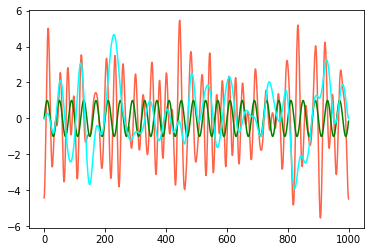

In [57]:
print(np.abs(sst_noise_f).max())
print(np.abs(sst_noise_f).argmax())
print(np.abs(sst_f).argmax())

sst_noise_f_filter = np.zeros(len(sst_noise_f), dtype = 'complex')
# sst_noise_f_filter[np.abs(sst_noise_f).argmax()] = sst_noise_f[np.abs(sst_noise_f).argmax()]
tr_f_min = 20
tr_f_max = 50

for i in range(tr_f_min,tr_f_max,1):
    sst_noise_f_filter[i] = sst_noise_f[i]



sst_fourier_filter = irfft(sst_noise_f_filter)





plt.figure('dwt filter')
# plt.plot(sst_noise, color = 'gold')
plt.plot(sst_fourier_filter, color = 'tomato')
plt.plot(sst, color = 'green')        
plt.plot(sst_tr, color = 'aqua')
# plt.plot(sst_fourier_filter, color = 'tomato')

25
25.0


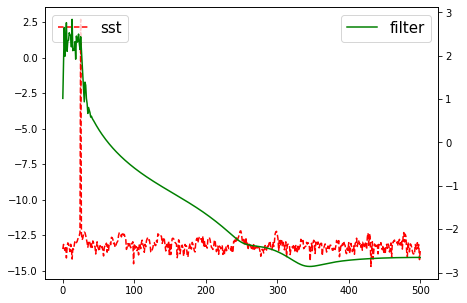

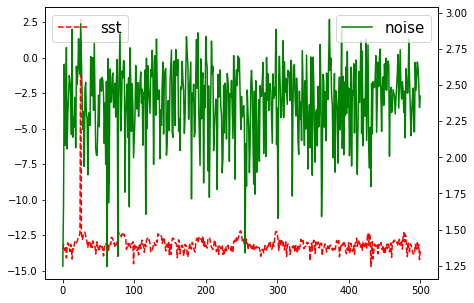

In [28]:
SAMPLE_RATE = Size #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

sst_f = rfft(sst)
sst_noise_f = rfft(sst_noise)
sst_tr_f = rfft(sst_tr)



xf = rfftfreq(N, 1 / SAMPLE_RATE)

print(np.abs(sst_f).argmax())
print(xf[np.abs(sst_f).argmax()])


fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
# ax1.plot(xf, np.log10(np.abs(sst_noise_f)), 'green', label='noise')
ax1.plot(xf, np.log10(np.abs(sst_f)), color='red', linestyle='--', label = 'sst')
ax2.plot(xf, np.log10(np.abs(sst_tr_f)), 'green', label='filter')


ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')



fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(122)
ax2 = ax1.twinx()
ax1.plot(xf, np.log10(np.abs(sst_f)), color='red', linestyle='--', label = 'sst')
ax2.plot(xf, np.log10(np.abs(sst_noise_f)), 'green', label='noise')
# ax1.plot(xf, np.log10(np.abs(sst_tr_f)), 'green', label='tr')


ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')

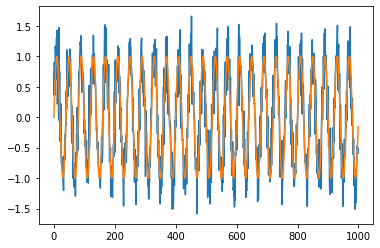

In [491]:
Size = 1000
T = 40
time = np.arange(0,Size,1)

sst = np.sin(2 * np.pi * time / T) 
sst_noise = sst + np.random.normal(0, 0.3, size = Size)


plt.figure('sst_noise')
plt.plot(time, sst_noise)
plt.plot(time, sst)



In [2]:
wavelet = 'db1'


coeffs_filter = pywt.wavedec(sst_noise, wavelet, mode = 'zero', level =2)


plt.figure('Coeffs')
for i in range(1, len(coeffs_filter)):
    plt.plot(coeffs_filter[i])
    for j in range(0,len(coeffs_filter[i])):
        coeffs_filter[i][j] = 0 

    
    
    
zero_d1 = np.zeros(len(sst_cD1))
sst_idwt = pywt.waverec(coeffs_filter,wavelet, mode = 'zero')

plt.figure("all sst")
plt.plot(sst_noise, color = 'green')
plt.plot(sst, color = 'black')
plt.plot(sst_idwt, color = 'red')


plt.figure("diff sst")
plt.plot(sst_noise - sst, color = 'green')
plt.plot(sst_idwt - sst, color = 'red')

NameError: name 'pywt' is not defined

In [619]:
# print(pywt.families())

# print(pywt.wavelist(kind = 'discrete'))

list_dwt = [j for j in pywt.wavelist(kind = 'discrete') if (j[0] != 'd' or j[1] != 'b')]
list_dwt = [j for j in list_dwt if (j[0] != 'b' or j[1] != 'i')]
list_dwt = [j for j in list_dwt if (j[0] != 'c' or j[1] != 'o')]
list_dwt = [j for j in list_dwt if (j[0] != 'r' or j[1] != 'b')]
list_dwt = [j for j in list_dwt if (j[0] != 's' or j[1] != 'y')]
print(list_dwt)


# print(set(pywt.wavelist(kind = 'discrete')) - set(list_dwt))

['dmey', 'haar']
